# VOORAF: packages/data inladen/functies...

### Packages importeren

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as stat

### Data inlezen en apart opslaan als lijsten:

In [37]:
data  = pd.read_csv('metingenpract4.txt', header = 0, sep = '\t')
data2  = pd.read_csv('metingenpract4tweedemassa.txt', header = 0, sep = '\t')

#     Genereren van latex code van de data frames: 
#print(data.to_latex())
#print(data2.to_latex())

#### Eerste data in aparte lijsten opslaan

In [42]:
f    = np.array(data['f'])
df   = np.array(data['df'])
a    = np.array(data['A'])
da   = np.array(data['dA'])
phi  = np.array(data['phi'])
dphi = np.array(data['dphi'])

In [43]:
#omzetten van frequentie naar hoeksnelheid, en graden naar radialen

Omega1 = 2*np.pi*f
dOmega1 = 2*np.pi*df
Phi1 = phi*np.pi/180
dPhi1 = dphi*np.pi/180

In [44]:
# Nog de systematische fout in rekening nemen

da += 1

#### Tweede data opslaan in lijsten:

In [52]:
f2    = np.array(data2['f'])
df2   = np.array(data2['df'])
a2    = np.array(data2['a'])
da2   = np.array(data2['da'])
phi2  = np.array(data2['phi'])
dphi2 = np.array(data2['dphi'])

#da2[25] = 1.5 #anders was dit 0 en werd er gedeeld door 0... Ik heb dan maar iets gelijk de rest genomen #datamanipulatie

In [53]:
#omzetten van frequentie naar hoeksnelheid, en graden naar radialen

Omega2 = 2*np.pi*f2
dOmega2 = 2*np.pi*df2
Phi2 = phi2*np.pi/180
dPhi2 = dphi2*np.pi/180

In [54]:
# Nog de systematische fout in rekening nemen

da2 += 1

## (Voorbereiding) Theoretische plots:

In [22]:
# de dingen van de voorbereidende opgave
def phase(W, b):
    return -np.arctan2(np.sqrt(2)*b*W,(1-W**2))
def ampl(W, X, b):
    return X/np.sqrt(W**4 + 2*(b**2-1)*W**2+1)

Voorbereidende opgave van pract: plot voor 10 waardes van $b$ tussen 0 en 1

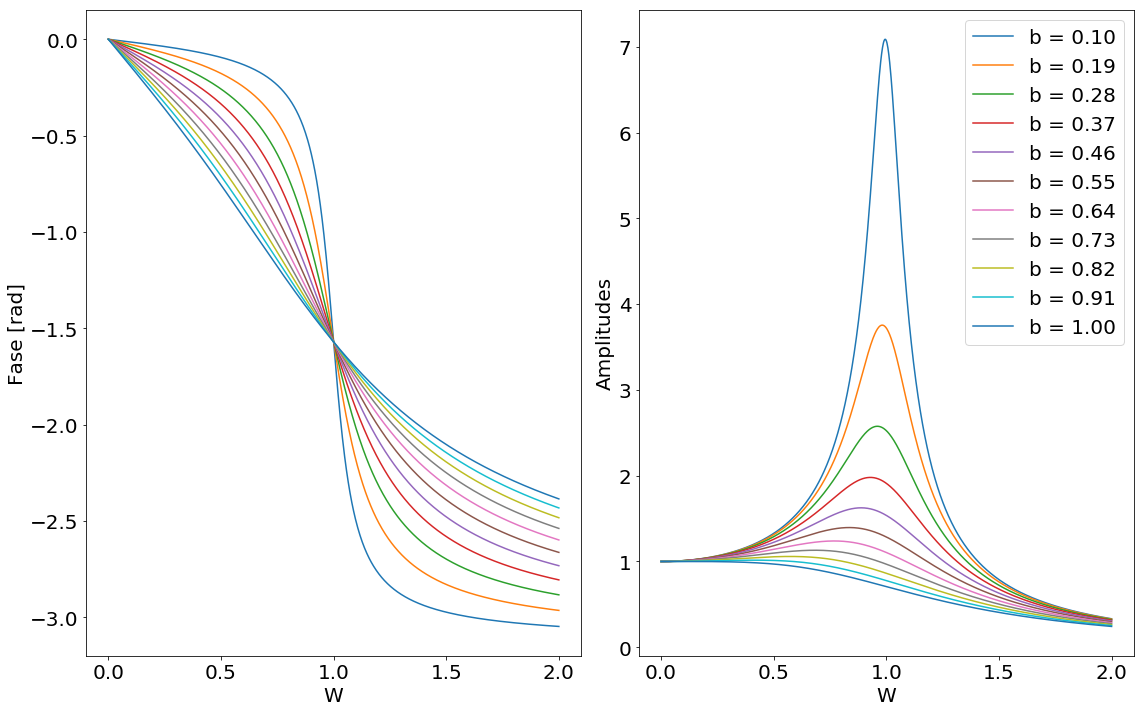

In [23]:
bvals = np.linspace(0.1, 1, 11) 
RadVelo = np.linspace(0, 2, 1000)
f = 20 # fontsize

X = 1
figTP, axTP = plt.subplots(1, 2, figsize = (16,10))

for b in bvals:
    Phases = phase(RadVelo, b)
    Amplitudes = ampl(RadVelo, X, b)

    axTP[0].plot(RadVelo, Phases, label = 'b = %f' %b)
    axTP[1].plot(RadVelo, Amplitudes, label = 'b = %0.2f' %b)
    
axTP[0].set_xlabel('W', fontsize = f)
axTP[0].set_ylabel('Fase [rad]', fontsize = f)
    
axTP[1].set_xlabel('W', fontsize = f)
axTP[1].set_ylabel('Amplitudes', fontsize = f)

axTP[0].tick_params(axis ='both', which ='major', labelsize = f)
axTP[1].tick_params(axis ='both', which ='major', labelsize = f)
plt.tight_layout()
plt.legend(fontsize = f)
plt.show()
figTP.savefig('theoretischeplots.pdf', bbox_inches = 'tight')

## De gebruikte fitfuncties

In [45]:
def least_squared(theta, f, x, y, sigma):
    elements = (y - f(x, theta))**2 / sigma**2    
    return np.sum(elements)

def model(W, theta): # OPGEPAST: andere fitparameters dan voorbereiding
    alpha = theta[0]
    beta = theta[1]
    omeganull = theta[2]
    
    return alpha/np.sqrt((omeganull**2 - W**2)**2 + (beta*W)**2)

def phasemodel(W, theta):
    gamma = theta[0]
    omegazero = theta[1]
    
    return -np.arctan2(W*gamma, (omegazero**2 - W**2))

# VOOR HET PRACTICUM ZELF:

## Plot van eerste dataset: metingen

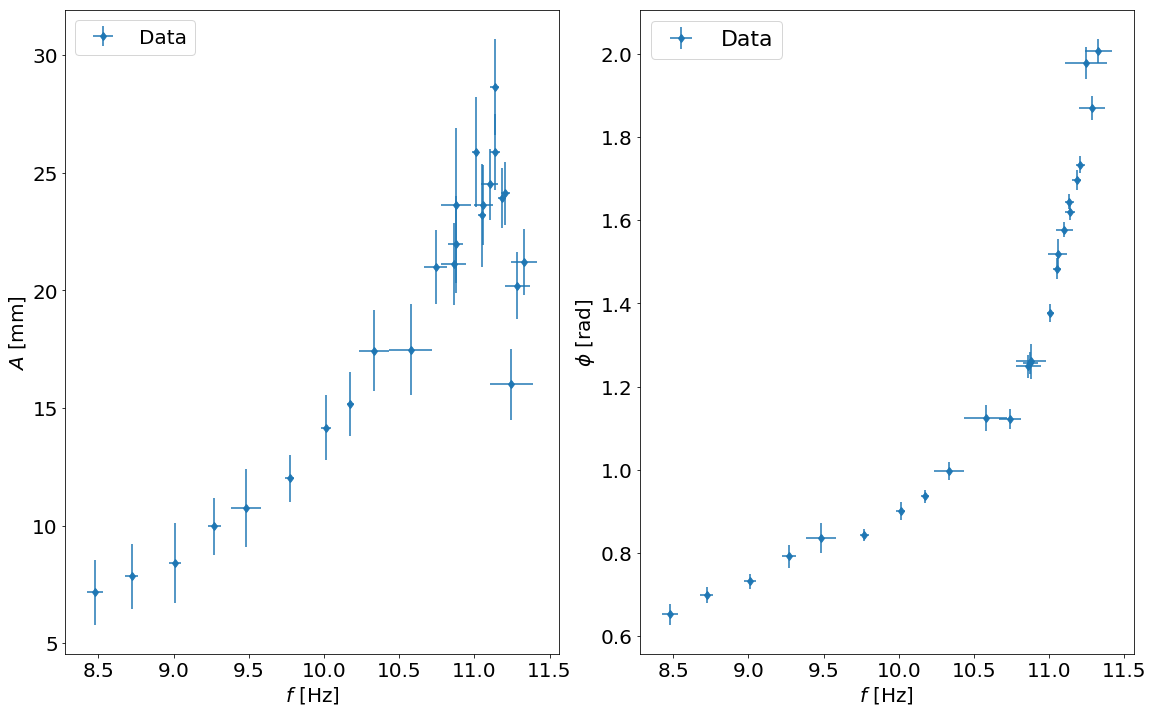

In [76]:
fig1, ax1 = plt.subplots(1, 2, figsize = (16,10))

# --- Amplitude ---
ax1[0].errorbar(Omega1, a, da, dOmega1, fmt = 'd', label = 'Data')
ax1[0].set_xlabel(r'$f$ [Hz]',  size = 20)
ax1[0].set_ylabel('$A$ [mm]', size = 20)
ax1[0].legend(loc = "upper left", fontsize = 20)
ax1[0].tick_params(axis = 'both', which = 'major', labelsize = 20)

# --- Phase ---
ax1[1].errorbar(Omega1, Phi1, dPhi1, dOmega1, fmt = 'd', label = 'Data')
ax1[1].set_xlabel(r'$f$ [Hz]',  size = 20)
ax1[1].set_ylabel('$\phi$ [rad]', size = 20)
ax1[1].legend(loc = "upper left", fontsize = 22)
ax1[1].tick_params(axis ='both', which ='major', labelsize = 20)

# Opslaan: 
plt.tight_layout()
plt.show()

fig1.savefig('plotdata1.pdf', bbox_inches='tight')

## Fits van data 1 

In [63]:
# 1: amplitude, 2: fase
ChiSq1 = lambda theta: least_squared(theta, model, Omega1, a, da)
ChiSq2 = lambda theta: least_squared(theta, phasemodel, Omega1, Phi1, dPhi1)

Opt1 = opt.minimize(ChiSq1, (10,0.1,1))
Opt2 = opt.minimize(ChiSq2, (10,10))

OptVals1 = Opt1['x']
OptVals2 = Opt2['x']

minimum1 = Opt1.fun
minimum2 = Opt2.fun
display(OptVals1, OptVals2)

array([357.10145072,  -1.37392419,  11.05781536])

array([-3.19073597, 11.10962961])

In [48]:
omegas = np.linspace(8,12,400)

alpha     = OptVals1[0]
beta      = OptVals1[1]
omeganull = OptVals1[2]
gamma     = OptVals2[0]
omegazero = OptVals2[1]

Amps = model(omegas, (alpha, beta, omeganull))
PhaseDiff = phasemodel(omegas, (gamma, omegazero))

### Plot van data + fit

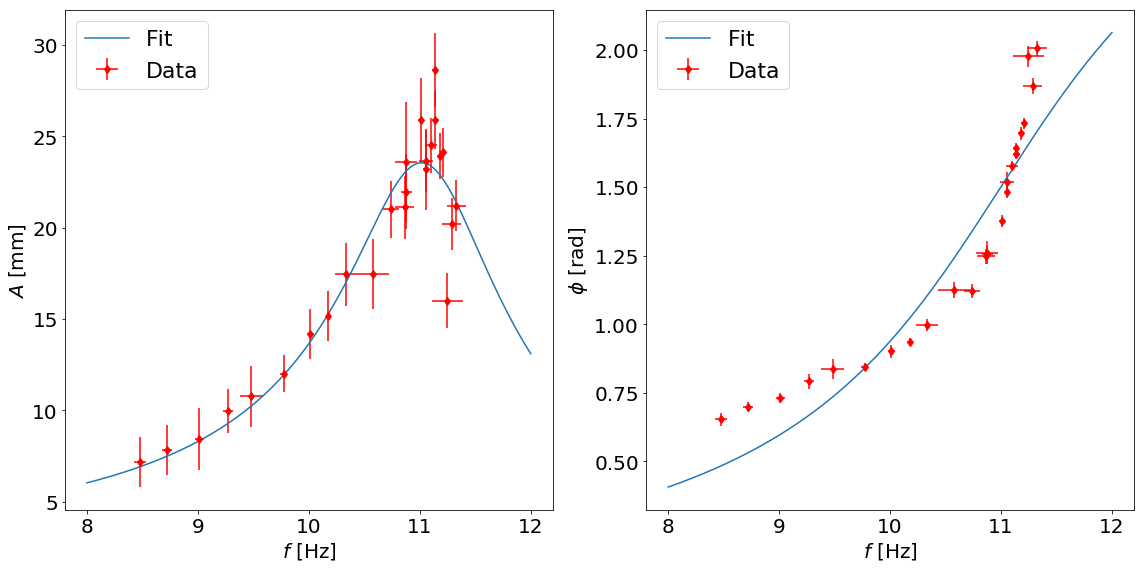

In [77]:
figFit1, axFit1 = plt.subplots(1,2, figsize = (16,8))

axFit1[0].plot(omegas, Amps, label = 'Fit')
axFit1[0].errorbar(Omega1, a, da, dOmega1, fmt = 'd', color='red', label = 'Data')
axFit1[0].set_xlabel(r'$f$ [Hz]',  size = 20)
axFit1[0].set_ylabel('$A$ [mm]', size = 20)
axFit1[0].legend(loc = "upper left", fontsize = 22)
axFit1[0].tick_params(axis ='both', which ='major', labelsize = 20)

axFit1[1].plot(omegas, PhaseDiff, label = 'Fit')
axFit1[1].errorbar(Omega1, Phi1, dPhi1, dOmega1, fmt = 'd', color = 'red', label  ='Data')
axFit1[1].set_xlabel(r'$f$ [Hz]',  size = 20)
axFit1[1].set_ylabel('$\phi$ [rad]', size = 20)
axFit1[1].legend(loc = "upper left", fontsize = 22)
axFit1[1].tick_params(axis ='both', which ='major', labelsize = 20)

plt.tight_layout()
plt.show()
figFit1.savefig('fitdata1.pdf', bbox_inches = 'tight')

# Tweede data

In [52]:
f2    = np.array(data2['f'])
df2   = np.array(data2['df'])
a2    = np.array(data2['a'])
da2   = np.array(data2['da'])
phi2  = np.array(data2['phi'])
dphi2 = np.array(data2['dphi'])

#da2[25] = 1.5 #anders was dit 0 en werd er gedeeld door 0... Ik heb dan maar iets gelijk de rest genomen #datamanipulatie

In [53]:
#omzetten van frequentie naar hoeksnelheid, en graden naar radialen

Omega2 = 2*np.pi*f2
dOmega2 = 2*np.pi*df2
Phi2 = phi2*np.pi/180
dPhi2 = dphi2*np.pi/180

In [54]:
# Nog de systematische fout in rekening nemen

da2 += 1

## Plot van tweede dataset

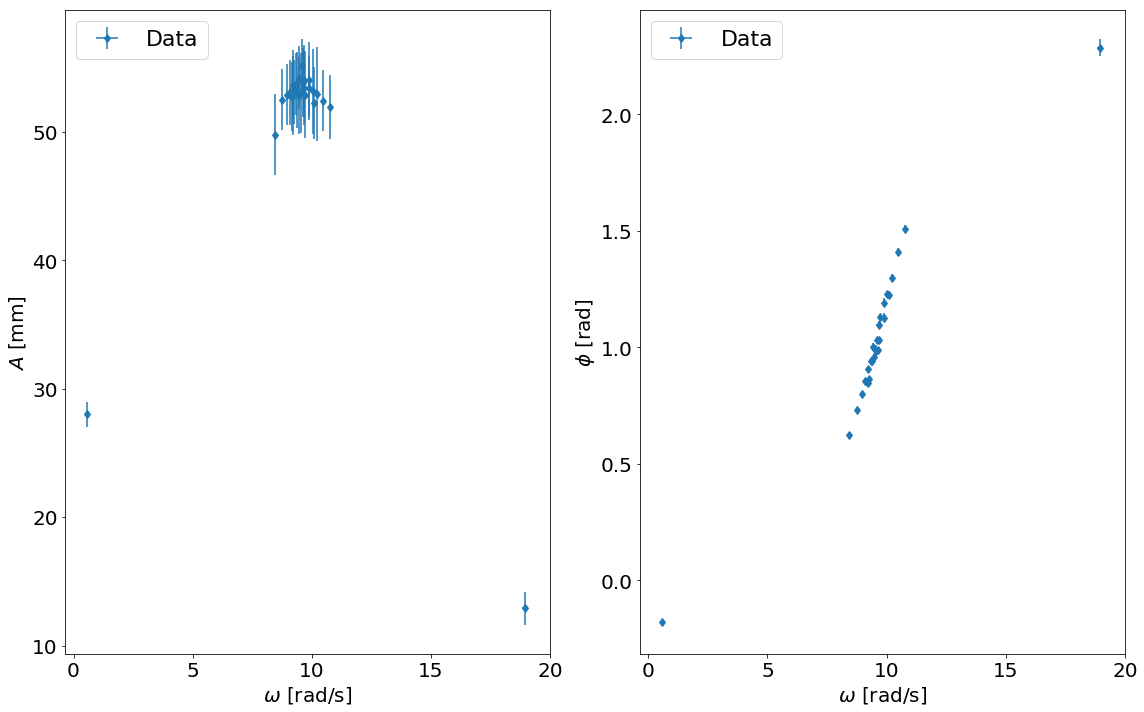

In [78]:
fig2, ax2 = plt.subplots(1, 2, figsize = (16,10))

ax2[0].errorbar(Omega2, a2, da2, dOmega2, fmt = 'd', label = 'Data')
ax2[0].set_xlabel(r'$\omega$ [rad/s]',  size = 20)
ax2[0].set_ylabel('$A$ [mm]', size = 20)
ax2[0].legend(loc = "upper left", fontsize = 22)
ax2[0].tick_params(axis ='both', which ='major', labelsize = 20)


ax2[1].errorbar(Omega2, Phi2, dPhi2, dOmega2, fmt = 'd', label = 'Data')
ax2[1].set_xlabel(r'$\omega$ [rad/s]',  size = 20)
ax2[1].set_ylabel('$\phi$ [rad]', size = 20)
ax2[1].legend(loc = "upper left", fontsize = 22)
ax2[1].tick_params(axis ='both', which ='major', labelsize = 20)

plt.tight_layout()
plt.show()
fig2.savefig('plotdata2.pdf', bbox_inches = 'tight')

## Fits van data 2

In [64]:
ChiSq3 = lambda theta: least_squared(theta, model, Omega2, a2, da2)
ChiSq4 = lambda theta: least_squared(theta, phasemodel, Omega2, Phi2, dPhi2)

Opt3 = opt.minimize(ChiSq3, (300,0.1,1))
Opt4 = opt.minimize(ChiSq4, (1,10))

OptVals3 = Opt3['x']
OptVals4 = Opt4['x']

minimum3 = Opt3.fun
minimum4 = Opt4.fun
display(OptVals3, OptVals4)

array([3205.80851047,    5.79868881,   10.63097543])

array([-4.18050895, 10.80793293])

In [59]:
omegas2 = np.linspace(0,20,500)

alpha2     = OptVals3[0]
beta2      = OptVals3[1]
omeganull2 = OptVals3[2]
gamma2     = OptVals4[0]
omegazero2 = OptVals4[1]

Amps2      = model(omegas2, (alpha2,beta2,omeganull2))
PhaseDiff2 = phasemodel(omegas2, (gamma2, omegazero2))

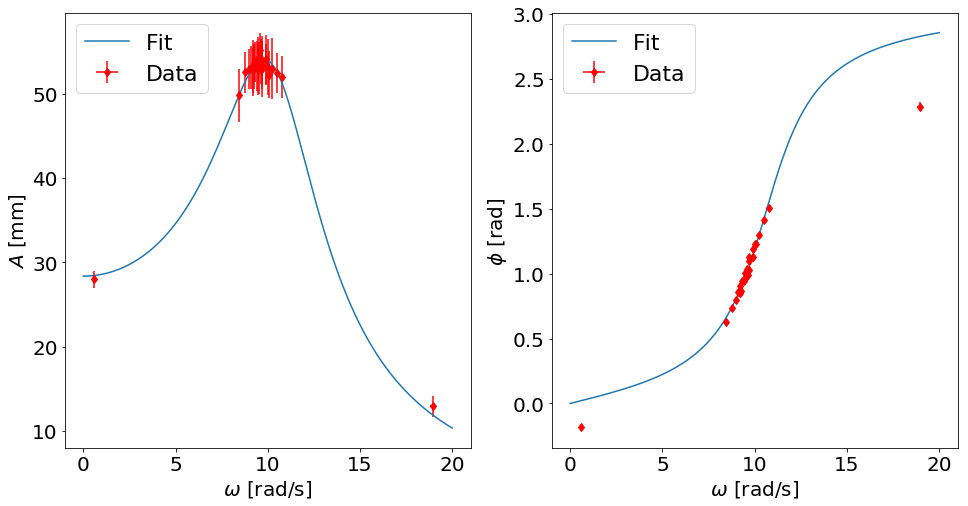

In [79]:
figFit2, axFit2 = plt.subplots(1,2, figsize = (16,8))

axFit2[0].plot(omegas2, Amps2, label = 'Fit')
axFit2[0].errorbar(Omega2, a2, da2, dOmega2, fmt = 'd', color='red', label = 'Data')
axFit2[0].set_xlabel(r'$\omega$ [rad/s]',  size = 20)
axFit2[0].set_ylabel('$A$ [mm]', size = 20)
axFit2[0].legend(loc = "upper left", fontsize = 22)
axFit2[0].tick_params(axis ='both', which ='major', labelsize = 20)

axFit2[1].plot(omegas2, PhaseDiff2, label = 'Fit')
axFit2[1].errorbar(Omega2, Phi2, dPhi2, dOmega2, fmt = 'd', color = 'red', label = 'Data')
axFit2[1].set_xlabel(r'$\omega$ [rad/s]',  size = 20)
axFit2[1].set_ylabel('$\phi$ [rad]', size = 20)
axFit2[1].legend(loc = "upper left", fontsize = 22)
axFit2[1].tick_params(axis ='both', which ='major', labelsize = 20)

plt.show()
figFit2.savefig('fitdata2.pdf', bbox_inches = 'tight')

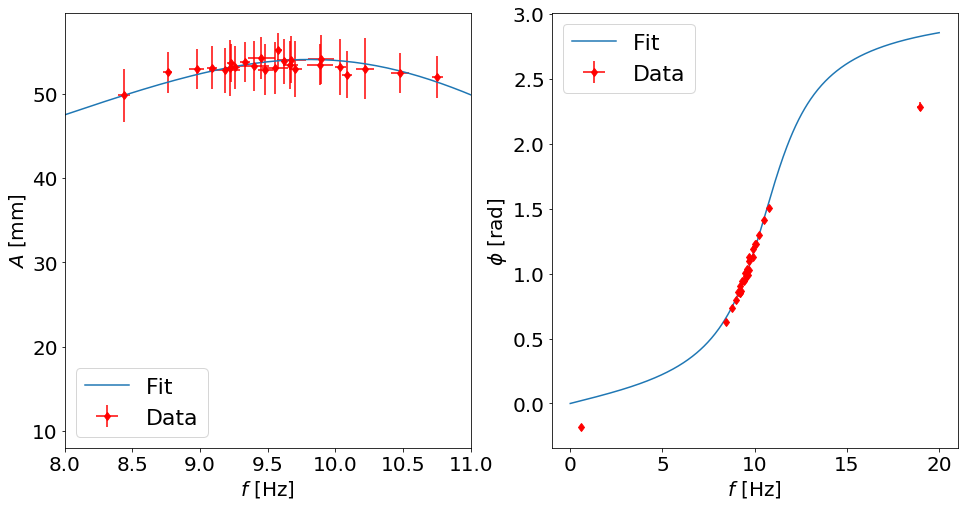

In [75]:
# !!!!!! Zelfde plot als hierboven maar linkse plot gefocust van 5 tot 15 (efkes in detail bekijken)

figFit2detail, axFit2detail = plt.subplots(1,2, figsize = (16,8))

axFit2detail[0].plot(omegas2, Amps2, label = 'Fit')
axFit2detail[0].errorbar(Omega2, a2, da2, dOmega2, fmt = 'd', color='red', label = 'Data')
axFit2detail[0].set_xlabel(r'$\omega$ [rad/s]',  size = 20)
axFit2detail[0].set_ylabel('$A$ [mm]', size = 20)
axFit2detail[0].legend(loc = "lower left", fontsize = 22)
axFit2detail[0].tick_params(axis ='both', which ='major', labelsize = 20)

axFit2detail[0].set_xlim(8, 11)

axFit2detail[1].plot(omegas2, PhaseDiff2, label = 'Fit')
axFit2detail[1].errorbar(Omega2, Phi2, dPhi2, dOmega2, fmt = 'd', color = 'red', label = 'Data')
axFit2detail[1].set_xlabel(r'$\omega$ [rad/s]',  size = 20)
axFit2detail[1].set_ylabel('$\phi$ [rad]', size = 20)
axFit2detail[1].legend(loc = "upper left", fontsize = 22)
axFit2detail[1].tick_params(axis ='both', which ='major', labelsize = 20)

plt.show()
#figFit2.savefig()

## Kwaliteit van de fit

Kwaliteit van fit 1 - amplitude:

In [66]:
vrijheidsgraden = len(f) - len(OptVals1)
p1 = 1 - stat.chi2.cdf(minimum1, vrijheidsgraden)

Kwaliteit van fit 1 - fase

In [67]:
vrijheidsgraden = len(f) - len(OptVals2)
p2 = 1 - stat.chi2.cdf(minimum2, vrijheidsgraden)

Kwaliteit van fit 2 - amplitude

In [68]:
vrijheidsgraden = len(f2) - len(OptVals3)
p3 = 1 - stat.chi2.cdf(minimum3, vrijheidsgraden)

Kwaliteit van fit 2 - fase

In [69]:
vrijheidsgraden = len(f2) - len(OptVals4)
p4 = 1 - stat.chi2.cdf(minimum4, vrijheidsgraden)

In [71]:
print('p1 =   ', p1)
print('p2 =   ', p2)
print('p3 =   ', p3)
print('p4 =   ', p4)

p1 =    0.02527927681874531
p2 =    0.0
p3 =    0.9999999904310507
p4 =    0.0


## Fouten op de parameters